# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Henry Kevin Marcelino Ratu
- **Email:** kevrat21@gmail.com
- **ID Dicoding:** kevrat

## Menentukan Pertanyaan Bisnis

- Apakah faktor cuaca mempengaruhi penyewaan sepeda?
- Tren penggunaan sepeda berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Karena baik hour.csv dan day.csv memiliki fields yang kurang lebih sama *`kecuali kolom hr yang tidak terdapat pada day.csv`* sehingga kita cukup memilih salah satu file yang akan digunakan

In [2]:
hour_df = pd.read_csv("hour.csv")

### Assessing Data

Melihat informasi data yang sudah kita masukkan

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Lakukan pengecekan data apakah hilang atau lengkap

In [5]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Lakukan pengecekan duplikasi data

In [6]:
hour_df.duplicated().sum()

0

Karena tidak ada duplikasi data sehingga bisa kita lewati tahap *cleaning data*

### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
hour_df.corr()

<ipython-input-8-3394dad3ede6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hour_df.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah faktor cuaca mempengaruhi penyewaan sepeda?

Text(0.5, 0, 'cuaca')

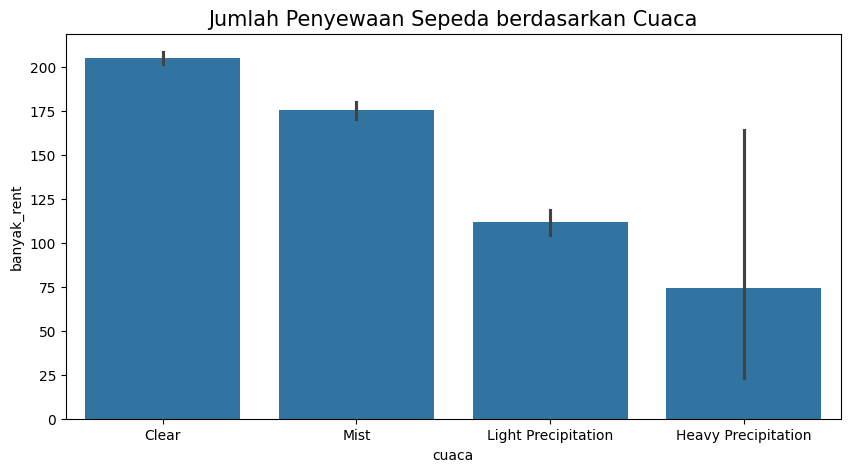

In [60]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="weathersit",
    data=hour_df,
)
plt.title("Jumlah Penyewaan Sepeda berdasarkan Cuaca", loc="center", fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Precipitation", "Heavy Precipitation"])
plt.ylabel("banyak_rent")
plt.xlabel("cuaca")

### Pertanyaan 2: Bagaimana Persebaran Penyewaan sepeda berdasarkan musim?

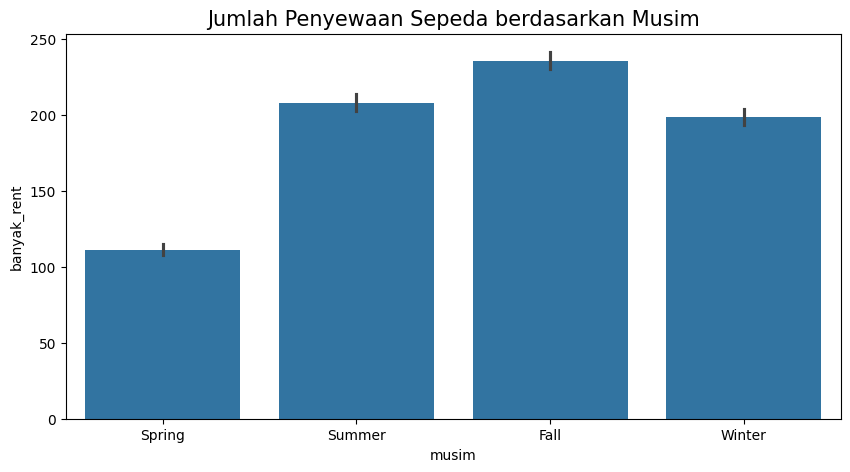

In [59]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="season",
    data=hour_df
)
plt.title("Jumlah Penyewaan Sepeda berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel("banyak_rent")
plt.xlabel("musim")

plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])

plt.show()

## Conclusion

- Conclution pertanyaan 1 : Cuaca menjadi faktor yang berpengaruh dalam banyaknya jumlah penyewaan sepeda,hal ini terlihat pada cuaca ke-4 (Hujan lebat) dengan jumlah terendah dalam penyewaan sepeda rendah
- Conclution pertanyaan 2 : Persebaran jumlah sewa sepeda tertinggi terdapat pada musim ketiga (Fall) diikuti musim kedua (Summer), musim keempat (Winter) dan terakhir musim pertama (Spring). Musim juga berpengaruh terhadap jumlah penyewaan sepeda